In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import seaborn as sns
import pickle

## DATA

In [2]:
df = pd.read_csv('for_model.csv')

In [3]:
len(df)

9404

In [4]:
# 篩選某個年份後
dfyear=df[(df['year']>2010)&(df['avg_rating'].notna())]

In [4]:
dfyear.columns

Index(['movie_id', 'imdb_id', 'title', 'en_title', 'budget', 'revenue',
       'release_date', 'avg_rating', 'vote_count', 'casts', 'genres',
       'production_companies', 'adult', 'budget_transfer', 'revenue_transfer',
       'actor1', 'actor2', 'actor3', 'actor4', 'actor5', 'actor6', 'year',
       'actor1_count', 'actor2_count', 'actor3_count', 'actor4_count',
       'actor5_count', 'actor6_count', 'sequal', 'year_gap', 'reunion_holiday',
       'non_reunion_holiday', 'decade', 'award_num', 'company_num',
       'genres_num', 'director', 'directing_win_count',
       'production_companies_freq', 'genres_freq', 'director_freq',
       'release_weekday', 'release_month'],
      dtype='object')

In [5]:
len(dfyear)

2778

In [6]:
X = dfyear[['budget_transfer','actor1_count','actor2_count','actor3_count','actor4_count','actor5_count','actor6_count','sequal','year_gap','reunion_holiday','non_reunion_holiday','decade','award_num','company_num','genres_num','directing_win_count','production_companies_freq','genres_freq','director_freq','release_weekday','release_month']]
y = dfyear['avg_rating']

In [7]:
X

,budget_transfer,actor1_count,actor2_count,actor3_count,actor4_count,actor5_count,actor6_count,sequal,year_gap,reunion_holiday,...,decade,award_num,company_num,genres_num,directing_win_count,production_companies_freq,genres_freq,director_freq,release_weekday,release_month
3,108.0,0,0,0,0,0,0,0.0,2.0,0.0,...,11.0,0.0,1.0,2.0,0.0,0.000106,0.001063,0.000106,2.0,5.0
6,91.0,0,0,0,0,0,0,0.0,12.0,0.0,...,10.0,0.0,1.0,9.0,0.0,0.000106,0.000106,0.000213,1.0,1.0
7,1000.0,0,0,0,0,0,0,0.0,1.0,0.0,...,11.0,0.0,7.0,3.0,0.0,0.000106,0.000213,0.000106,6.0,7.0
9,10800.0,0,0,0,0,0,1,0.0,2.0,0.0,...,11.0,1.0,3.0,3.0,0.0,0.000106,0.000106,0.000213,6.0,4.0
31,78000000.0,1,0,0,0,1,0,0.0,12.0,0.0,...,10.0,2.0,5.0,3.0,1.0,0.000106,0.000319,0.003084,4.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9398,6893000.0,0,0,0,0,0,0,0.0,3.0,0.0,...,10.0,0.0,4.0,2.0,0.0,0.000106,0.031901,0.000106,6.0,7.0
9400,2484000.0,0,0,0,0,0,0,0.0,2.0,0.0,...,11.0,0.0,1.0,2.0,0.0,0.000106,0.004147,0.000106,7.0,5.0
9401,16950000.0,0,0,0,0,0,0,0.0,3.0,0.0,...,10.0,0.0,1.0,2.0,0.0,0.000106,0.005317,0.000425,5.0,10.0
9402,13560000.0,0,0,0,0,0,0,0.0,3.0,0.0,...,10.0,0.0,2.0,3.0,0.0,0.000106,0.000106,0.000106,4.0,7.0


In [8]:
y

3        9.000
6       10.000
7        8.000
9       10.000
31       6.635
         ...  
9398     5.857
9400     7.100
9401     7.471
9402     7.318
9403     7.000
Name: avg_rating, Length: 2778, dtype: float64

In [9]:
y.isna().sum()

0

## 挑選特徵

#### LASSO

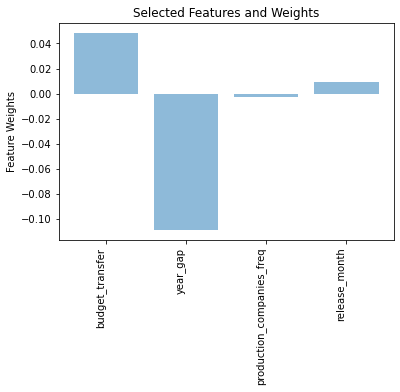

(Index(['budget_transfer', 'year_gap', 'production_companies_freq',
        'release_month'],
       dtype='object'),
 array([ 0.0486514 , -0.10913184, -0.00265046,  0.00947003]))

In [10]:
def select_features_with_lasso_and_visualize(X, y, alpha=0.1):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    lasso = Lasso(alpha=alpha)
    lasso.fit(X_scaled, y)

    nonzero_indices = np.nonzero(lasso.coef_)[0]
    selected_features = X.columns[nonzero_indices]
    feature_weights = lasso.coef_[nonzero_indices]

    # Visualize selected features and their weights using a bar chart
    fig, ax = plt.subplots()
    y_pos = np.arange(len(selected_features))
    ax.bar(y_pos, feature_weights, align='center', alpha=0.5)
    ax.set_xticks(y_pos)
    ax.set_xticklabels(selected_features, rotation=90, ha='right')
    ax.set_ylabel('Feature Weights')
    ax.set_title('Selected Features and Weights')
    plt.show()

    return selected_features, feature_weights
select_features_with_lasso_and_visualize(X, y)

### 隨機森林

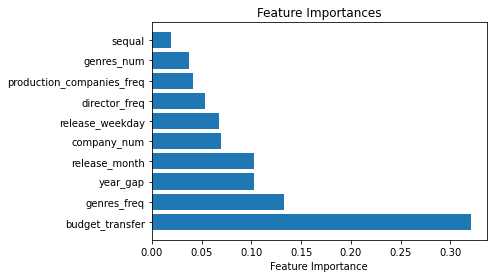

,budget_transfer,actor1_count,actor2_count,actor3_count,actor4_count,actor5_count,actor6_count,sequal,year_gap,reunion_holiday,...,decade,award_num,company_num,genres_num,directing_win_count,production_companies_freq,genres_freq,director_freq,release_weekday,release_month
3,108.0,0,0,0,0,0,0,0.0,2.0,0.0,...,11.0,0.0,1.0,2.0,0.0,0.000106,0.001063,0.000106,2.0,5.0
6,91.0,0,0,0,0,0,0,0.0,12.0,0.0,...,10.0,0.0,1.0,9.0,0.0,0.000106,0.000106,0.000213,1.0,1.0
7,1000.0,0,0,0,0,0,0,0.0,1.0,0.0,...,11.0,0.0,7.0,3.0,0.0,0.000106,0.000213,0.000106,6.0,7.0
9,10800.0,0,0,0,0,0,1,0.0,2.0,0.0,...,11.0,1.0,3.0,3.0,0.0,0.000106,0.000106,0.000213,6.0,4.0
31,78000000.0,1,0,0,0,1,0,0.0,12.0,0.0,...,10.0,2.0,5.0,3.0,1.0,0.000106,0.000319,0.003084,4.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9398,6893000.0,0,0,0,0,0,0,0.0,3.0,0.0,...,10.0,0.0,4.0,2.0,0.0,0.000106,0.031901,0.000106,6.0,7.0
9400,2484000.0,0,0,0,0,0,0,0.0,2.0,0.0,...,11.0,0.0,1.0,2.0,0.0,0.000106,0.004147,0.000106,7.0,5.0
9401,16950000.0,0,0,0,0,0,0,0.0,3.0,0.0,...,10.0,0.0,1.0,2.0,0.0,0.000106,0.005317,0.000425,5.0,10.0
9402,13560000.0,0,0,0,0,0,0,0.0,3.0,0.0,...,10.0,0.0,2.0,3.0,0.0,0.000106,0.000106,0.000106,4.0,7.0


In [11]:
def train_rf_and_get_importances_with_plot(X, y, problem_type="regression", top_n=10, threshold=None):
    if problem_type == "classification":
        rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    else:
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    rf_model.fit(X, y)
    importances = rf_model.feature_importances_

    fig, ax = plt.subplots()
    num_features = len(importances)
    if top_n > num_features:
        top_n = num_features
    indices = np.argsort(importances)[-top_n:][::-1]
    ax.barh(range(top_n), importances[indices], align='center')
    ax.set_yticks(range(top_n))
    ax.set_yticklabels([X.columns[i] for i in indices])
    ax.set_xlabel('Feature Importance')
    ax.set_title('Feature Importances')
    plt.show()

    if threshold:
        sfm = SelectFromModel(rf_model, threshold=threshold)
        sfm.fit(X, y)
        X_important = sfm.transform(X)
        print(f"篩選後的特徵維度： {X_important.shape[1]}")
        return X_important
    else:
        return X
train_rf_and_get_importances_with_plot(X,y,problem_type="regression")

## 多模型比較

LinearRegression R2 score: -0.007935098647703143
XGBoost R2 score: 0.011695199713196325
SVM R2 score: 0.013624499983010185
DecisionTree R2 score: -0.49719351495259745


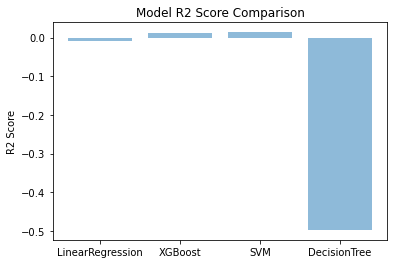

{'LinearRegression': -0.007935098647703143,
 'XGBoost': 0.011695199713196325,
 'SVM': 0.013624499983010185,
 'DecisionTree': -0.49719351495259745}

In [12]:
def train_and_evaluate_models(X, y, random_state=48, scaler=StandardScaler()):
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)

    # Standardize data
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define the models
    models = {
        'LinearRegression': LinearRegression(),
        'XGBoost': xgb.XGBRegressor(max_depth=8, n_estimators=2000, learning_rate=0.008),
        'SVM': SVR(),
        'DecisionTree': DecisionTreeRegressor()
    }

    # Train the models, make predictions and evaluate using R2 score
    r2_scores = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        r2_scores[model_name] = r2_score(y_test, preds)
        print(f'{model_name} R2 score: {r2_scores[model_name]}')

    # Visualize R2 scores using a bar chart
    fig, ax = plt.subplots()
    model_names = list(r2_scores.keys())
    r2_values = list(r2_scores.values())
    y_pos = np.arange(len(model_names))
    ax.bar(y_pos, r2_values, align='center', alpha=0.5)
    ax.set_xticks(y_pos)
    ax.set_xticklabels(model_names)
    ax.set_ylabel('R2 Score')
    ax.set_title('Model R2 Score Comparison')
    plt.show()

    return r2_scores
train_and_evaluate_models(X, y, random_state=1)

## 減少特徵後再次跑模型

### 相關係數 熱力圖

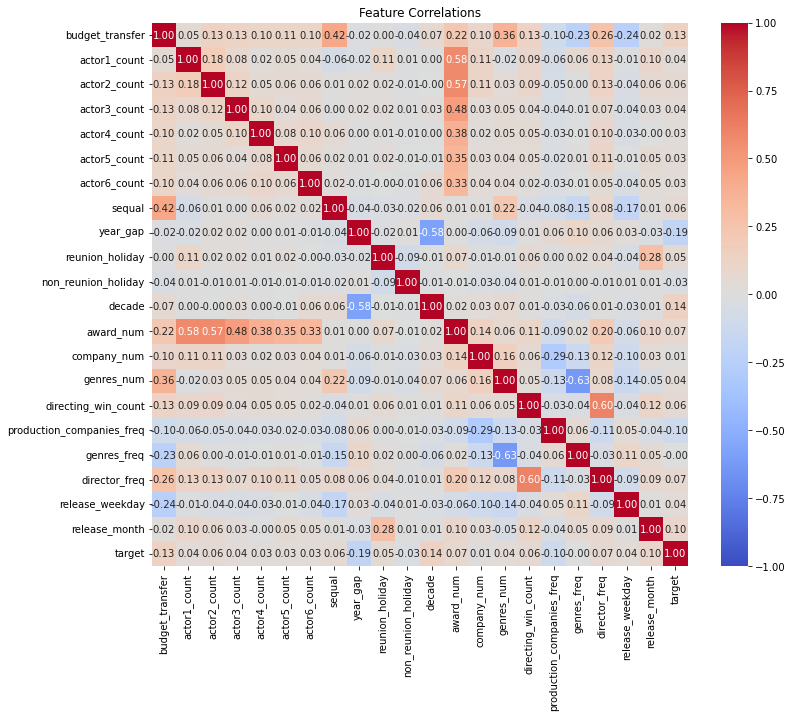

與目標變量的相關係數：
year_gap                     0.187921
decade                       0.135657
budget_transfer              0.134925
production_companies_freq    0.102438
release_month                0.101370
award_num                    0.073832
director_freq                0.068828
sequal                       0.061260
actor2_count                 0.059679
directing_win_count          0.056479
reunion_holiday              0.053012
release_weekday              0.043078
genres_num                   0.041973
actor1_count                 0.036152
actor3_count                 0.035179
actor5_count                 0.033845
actor6_count                 0.031334
actor4_count                 0.025763
non_reunion_holiday          0.025666
company_num                  0.009603
genres_freq                  0.002979
Name: target, dtype: float64

根據相關係數選擇的特徵：
Index(['year_gap', 'decade', 'budget_transfer', 'production_companies_freq',
       'release_month'],
      dtype='object')


Index(['year_gap', 'decade', 'budget_transfer', 'production_companies_freq',
       'release_month'],
      dtype='object')

In [13]:
def select_features_by_correlation(X, y, threshold=0.1, plot_heatmap=True):
    # 將 y 添加到 DataFrame 中
    X_with_target = X.copy()
    X_with_target['target'] = y

    # 計算相關係數
    correlations = X_with_target.corr()

    # 繪製熱力圖
    if plot_heatmap:
        plt.figure(figsize=(12, 10))
        sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
        plt.title("Feature Correlations")
        plt.show()

    # 計算與目標變量的相關係數並排序
    target_correlations = correlations['target'].drop('target', axis=0)
    target_correlations_sorted = target_correlations.abs().sort_values(ascending=False)

    print("與目標變量的相關係數：")
    print(target_correlations_sorted)

    # 挑選與目標變量相關係數絕對值大於某個閾值的特徵
    selected_features = target_correlations_sorted[target_correlations_sorted.abs() > threshold].index
    print("\n根據相關係數選擇的特徵：")
    print(selected_features)

    return selected_features
select_features_by_correlation(X, y)

In [14]:
# 減少特徵欄位
X = dfyear[['budget_transfer','sequal','production_companies_freq','genres_freq','director_freq','release_month',
            'year_gap','award_num','actor2_count','directing_win_count','reunion_holiday']]
y = dfyear['avg_rating']

LinearRegression R2 score: -0.0011799292042335985
XGBoost R2 score: 0.01571557602153384
SVM R2 score: 0.01185381750421488
DecisionTree R2 score: -0.5639473446897212


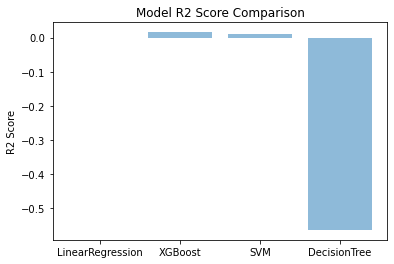

{'LinearRegression': -0.0011799292042335985,
 'XGBoost': 0.01571557602153384,
 'SVM': 0.01185381750421488,
 'DecisionTree': -0.5639473446897212}

In [15]:
train_and_evaluate_models(X, y, random_state=1)

## 選定XGBOOST

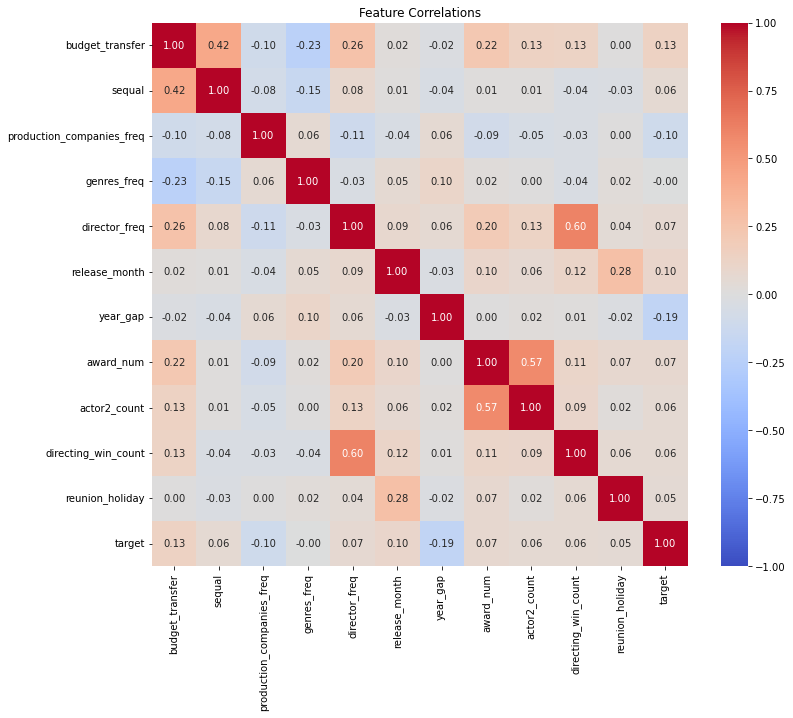

與目標變量的相關係數：
year_gap                     0.187921
budget_transfer              0.134925
production_companies_freq    0.102438
release_month                0.101370
award_num                    0.073832
director_freq                0.068828
sequal                       0.061260
actor2_count                 0.059679
directing_win_count          0.056479
reunion_holiday              0.053012
genres_freq                  0.002979
Name: target, dtype: float64

根據相關係數選擇的特徵：
Index(['year_gap', 'budget_transfer', 'production_companies_freq',
       'release_month'],
      dtype='object')


Index(['year_gap', 'budget_transfer', 'production_companies_freq',
       'release_month'],
      dtype='object')

In [16]:
# 繪製相關係數熱力圖
select_features_by_correlation(X, y)

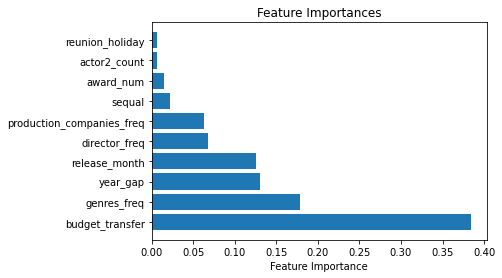

,budget_transfer,sequal,production_companies_freq,genres_freq,director_freq,release_month,year_gap,award_num,actor2_count,directing_win_count,reunion_holiday
3,108.0,0.0,0.000106,0.001063,0.000106,5.0,2.0,0.0,0,0.0,0.0
6,91.0,0.0,0.000106,0.000106,0.000213,1.0,12.0,0.0,0,0.0,0.0
7,1000.0,0.0,0.000106,0.000213,0.000106,7.0,1.0,0.0,0,0.0,0.0
9,10800.0,0.0,0.000106,0.000106,0.000213,4.0,2.0,1.0,0,0.0,0.0
31,78000000.0,0.0,0.000106,0.000319,0.003084,9.0,12.0,2.0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9398,6893000.0,0.0,0.000106,0.031901,0.000106,7.0,3.0,0.0,0,0.0,0.0
9400,2484000.0,0.0,0.000106,0.004147,0.000106,5.0,2.0,0.0,0,0.0,0.0
9401,16950000.0,0.0,0.000106,0.005317,0.000425,10.0,3.0,0.0,0,0.0,0.0
9402,13560000.0,0.0,0.000106,0.000106,0.000106,7.0,3.0,0.0,0,0.0,0.0


In [17]:
# 隨機森林篩選特徵
train_rf_and_get_importances_with_plot(X,y,problem_type="regression")

### 選擇最後要的特徵 ->調整超參數 ->訓練出最後模型

In [19]:
# 減少特徵欄位
X = dfyear[['budget_transfer','sequal','award_num','production_companies_freq','director_freq','release_month',
           'year_gap']]
y = dfyear['avg_rating']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=48)
#標準化
scaler = StandardScaler()
# 對訓練集進行標準化
X_train = scaler.fit_transform(X_train)
# 對測試集進行標準化
X_test = scaler.transform(X_test)
#將資料分成三份 調整參數
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

R² on testing set: 0.20


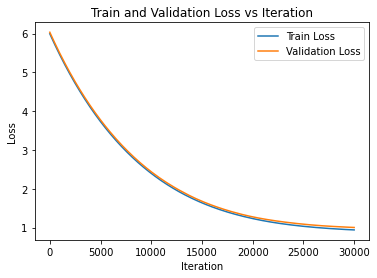

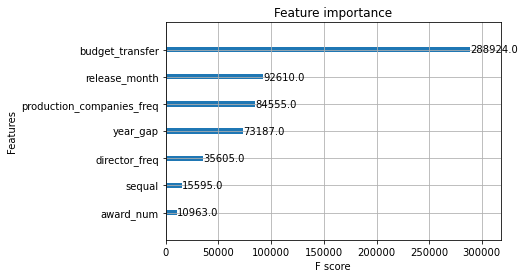

In [21]:
# 調整參數，訓練出最好模型
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import xgboost as xgb

# 訓練模型

params = {'max_depth': 5, 'n_estimators': 30000, 'learning_rate': 0.0001, 'early_stopping_rounds': 10, 'eval_metric': 'rmse','random_state' :1,}#'booster' :'dart'
xgb_model = xgb.XGBRegressor(**params)
xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], verbose=0)

# 預測結果(用第三份測試集)
y_test_pred = xgb_model.predict(X_test)

# 計算R²
r2_test = r2_score(y_test, y_test_pred)

print(f"R² on testing set: {r2_test:.2f}")


# 繪製訓練和驗證損失
evals_result = xgb_model.evals_result()
plt.plot(evals_result["validation_0"]["rmse"], label="Train Loss")
plt.plot(evals_result["validation_1"]["rmse"], label="Validation Loss")  
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Train and Validation Loss vs Iteration")
plt.legend()
plt.show()
xgb.plot_importance(xgb_model)
plt.show()

## 將最終訓練的模型存檔 供Flask使用

In [57]:
# 將頻率編碼對應的欄位數字存成字典
def save_freq_dict(df, feature_name):
    freq_dict = df.set_index(feature_name)[f"{feature_name}_freq"].to_dict()
    with open(f"{feature_name}_freq_mapping.pkl", "wb") as file:
        pickle.dump(freq_dict, file)

# 預計有哪些欄位需要對應存檔
save_freq_dict(df, "genres")
save_freq_dict(df, "production_companies")
save_freq_dict(df, "director")


In [58]:
# 模型存檔
with open("xgb_model.pkl", "wb") as file:
    pickle.dump(xgb_model, file)
# 標準化數據存檔
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)